In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = 'white'

In [26]:
df = pd.read_csv("./data.csv", header=None)
df

,0,1,2,3
0,native,8,40.76,4.731624e+02
1,native_with_size_hint,8,39.23,4.411371e+02
2,simd_f32x8,8,36.46,1.556084e+02
3,native_par,8,135528.39,1.060180e+11
4,ndarray_dot,8,44.78,2.955916e+02
...,...,...,...,...
1738,simd_unrolled4_f32x16,4608000,5635391.60,6.833869e+10
1739,native_par,4608000,3774595.96,1.599830e+12
1740,simd_par,4608000,3374744.78,1.063548e+12
1741,simd_par_better,4608000,3133146.78,1.635213e+12


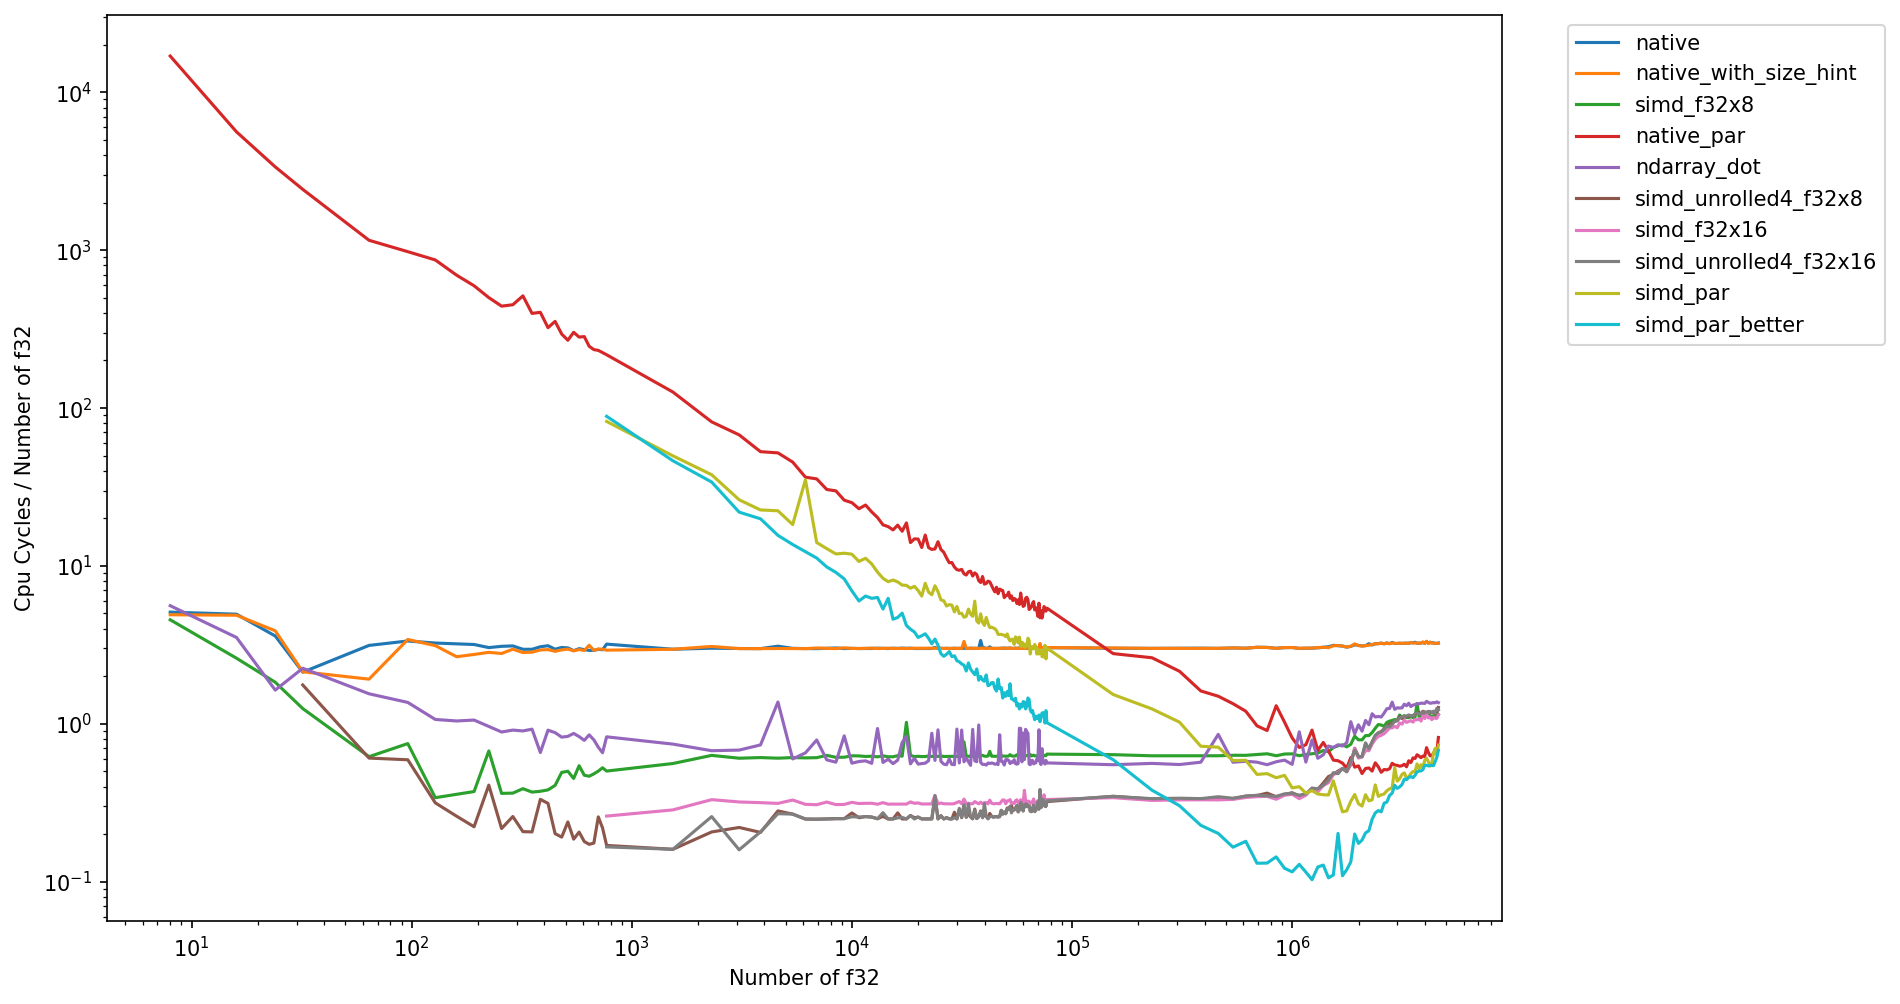

In [27]:
plt.figure(figsize=(12, 8), dpi=150, facecolor='white')
for name in df[0].unique():
    data = df[df[0] == name]
    
    x = data[1].sort_values()
    y = data[2][x.index]
    
    plt.plot(
        x,
        y / x,
        label=name
    )
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Cpu Cycles / Number of f32")
plt.xlabel("Number of f32")
plt.savefig("benchmarks.png")
plt.show()